<a href="https://colab.research.google.com/github/adlysk/FIFA-players/blob/main/classifying_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/fifa2 (1).csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PreferredFoot       10003 non-null  int64 
 1   Age                 10003 non-null  int64 
 2   PreferredPositions  10003 non-null  object
 3   Value               10003 non-null  int64 
 4   Wage                10003 non-null  int64 
 5   ContractLength      10003 non-null  int64 
 6   BallControl         10003 non-null  int64 
 7   Dribbling           10003 non-null  int64 
 8   Marking             10003 non-null  int64 
 9   SlideTackle         10003 non-null  int64 
 10  StandTackle         10003 non-null  int64 
 11  Aggression          10003 non-null  int64 
 12  Reactions           10003 non-null  int64 
 13  Att.Position        10003 non-null  int64 
 14  Interceptions       10003 non-null  int64 
 15  Vision              10003 non-null  int64 
 16  Composure           10

In [ ]:
df.head()

,PreferredFoot,Age,PreferredPositions,Value,Wage,ContractLength,BallControl,Dribbling,Marking,SlideTackle,...,LongShots,Curve,FKAcc.,Penalties,Volleys,GKPositioning,GKDiving,GKHandling,GKKicking,GKReflexes
0,0,21,mid,650000,2300,2022,62,67,30,34,...,60,64,67,64,59,7,14,13,9,9
1,1,25,def,450000,3200,2024,56,54,58,57,...,40,47,20,32,30,11,7,10,6,10
2,1,30,def,1400000,9100,2023,63,64,60,72,...,58,52,54,38,38,11,10,16,7,10
3,1,25,def,375000,1800,2023,32,32,65,57,...,31,41,37,49,39,11,10,10,12,8
4,0,19,def,250000,1800,2021,52,53,50,53,...,41,38,28,30,38,6,13,14,9,12


In [ ]:
X=df.drop('PreferredPositions',axis=1)
y=df.PreferredPositions

In [ ]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y, test_size=0.7,random_state=42)

In [ ]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(3000, 39) (3000,)
(7003, 39) (7003,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('pca', PCA(n_components = X_train.shape[1])), ('std', StandardScaler()), ('Logistic Regression', LogisticRegression())], verbose = True)

In [ ]:
pipe.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.4s


Pipeline(steps=[('pca', PCA(n_components=39)), ('std', StandardScaler()),
                ('Logistic Regression', LogisticRegression())],
         verbose=True)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
predictions=pipe.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9556666666666667
[[ 417    0    0    0]
 [   0  329    0   14]
 [   0    0  929   39]
 [   0   19   61 1192]]
              precision    recall  f1-score   support

          GK       1.00      1.00      1.00       417
         att       0.95      0.96      0.95       343
         def       0.94      0.96      0.95       968
         mid       0.96      0.94      0.95      1272

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(pipe, X, y, cv=kf)
print(cv_scores)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.5s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.5s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.6s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.5s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[P

In [ ]:
cv_scores.mean()/accuracy_score(y_test, predictions) # NOT OVERFITTING

1.0062210682328734

In [ ]:
import xgboost as xgb
import numpy as np

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.909667


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),"solver": ["sag","lsqr"]}
ridge = RidgeClassifier()
pipe = Pipeline([('pca', PCA(n_components = X_train.shape[1])), ('std', StandardScaler()), ('Logistic Regression', LogisticRegression())], verbose = True)
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.4201095136127256


In [ ]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(),
                                 param_grid={'C': [0.1, 10.]},
                                 cv=2,
                                 refit=True))

clf.fit(X_train,y_train)
predictions=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(accuracy_score(y_test, predictions))

0.956


In [ ]:
pipe3 = Pipeline([('pca', PCA(n_components = X_train.shape[1])), ('std', StandardScaler()), ('xgb', xgb.XGBClassifier())], verbose = True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {
    'xgb__learning_rate': np.arange(.05, 1, .05),
    'xgb__max_depth': np.arange(3,10, 1),
    'xgb__n_estimators': np.arange(10, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipe3,
                                        param_distributions=gbm_param_grid,
                                        n_iter=2, scoring='roc_auc', cv=2, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X_train, y_train)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing xgb, total=   2.3s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,


[Pipeline] ............... (step 3 of 3) Processing xgb, total=   2.4s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,


[Pipeline] ............... (step 3 of 3) Processing xgb, total=   2.6s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,


[Pipeline] ............... (step 3 of 3) Processing xgb, total=   2.6s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan]
  category=UserWarning,


[Pipeline] ............... (step 3 of 3) Processing xgb, total=   5.7s
nan
Pipeline(steps=[('pca', PCA(n_components=39)), ('std', StandardScaler()),
                ('xgb',
                 XGBClassifier(learning_rate=0.35000000000000003, max_depth=9,
                               n_estimators=60, objective='multi:softprob'))],
         verbose=True)


In [ ]:
predictions=randomized_roc_auc.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9573333333333334


In [ ]:
from sklearn.model_selection import GridSearchCV
eval_set=[(X_test, y_test)]
PARAMETERS = {"subsample":[0.5, 0.75, 1],"colsample_bytree":[0.5, 0.75, 1],"max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}


model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="merror",eval_set=eval_set,verbose=0)

print(model_gs.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}


In [ ]:
predictions=model_gs.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#SLIGHTLY IMPROVED

0.965
[[ 417    0    0    0]
 [   0  325    0   18]
 [   0    0  939   29]
 [   0   11   47 1214]]
              precision    recall  f1-score   support

          GK       1.00      1.00      1.00       417
         att       0.97      0.95      0.96       343
         def       0.95      0.97      0.96       968
         mid       0.96      0.95      0.96      1272

    accuracy                           0.96      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.96      0.96      3000



In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y=y.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.20)
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(39,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(4, activation='softmax', name='output'))
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100)
# Test on unseen data
results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                400       
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 4)                 44        
                                                                 
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/100
1601/1601 - 3s - loss: 0.5365 - accuracy: 0.7856 - 3s/epoch - 2ms/step
Epoch 2/100
1601/1601 - 2s - loss: 0.2207 - accuracy: 0.9093 - 2s/epoch - 1ms/step
Epoch 3/100
1601/1601 - 2s - loss: 0.1798 - accuracy: 0.9283 - 2s/epoch - 1ms/step
Epoch 4/100
1601/1601 - 2s - loss: 0.1549 - accuracy: 0.9389 - 2s/epoch - 1ms/step
Epoch 5/100
1601/1601 - 2s - loss: 0.1416 - accuracy: 0.9459 - 2s/epoch - 1ms/step
Epoch 6/100
1601/1601 - 2s - loss: 0.1319 - accuracy: 0.9478 - 2s/epoch - 1ms/step
Epoch 7/100
1601/1601 - 2s - loss: 0.1260 - accuracy: 0.9523 - 2s/epoch - 1ms/step
Epoch 8/100
1601/1601 - 2s - loss: 0.1216 - accuracy: 0.9551 - 2s/epoch - 1ms/step
Epoch 9/100
1601/1601 - 2s - loss: 0.1194 - accuracy: 0.9538 - 2s/epoch - 1ms/step
Epoch 10/100
1601/1601 - 2s - loss: 0.1197 - accuracy: 0.9538 - 2s/epoch - 1ms/step
Epoch 11/100
1601/1601 - 2s - loss: 0.1143 - accuracy: 0.9569 - 2s/epoch - 1ms/step
Epoch 12/100
1601/1601 - 2s - loss: 0.1136 - accuracy: 0.9549 - 2s/epoch - 1ms/s

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
model=Sequential()
model.add(Dense(1000,input_shape=(39,),activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['Precision'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1000)              40000     
                                                                 
 dense_25 (Dense)            (None, 500)               500500    
                                                                 
 dense_26 (Dense)            (None, 300)               150300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 1204      
                                                                 
Total params: 692,004
Trainable params: 692,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h_callback=model.fit(train_x, train_y,epochs=100,validation_split=0.4,callbacks = [early_stopping], batch_size=5)

Epoch 1/100
961/961 [==============================] - 11s 12ms/step - loss: 0.1264 - precision: 0.9536 - val_loss: 0.2081 - val_precision: 0.9272
Epoch 2/100
961/961 [==============================] - 11s 12ms/step - loss: 0.1137 - precision: 0.9565 - val_loss: 0.1082 - val_precision: 0.9581
Epoch 3/100
961/961 [==============================] - 11s 11ms/step - loss: 0.1269 - precision: 0.9533 - val_loss: 0.1348 - val_precision: 0.9504
Epoch 4/100
961/961 [==============================] - 10s 10ms/step - loss: 0.1171 - precision: 0.9581 - val_loss: 0.1179 - val_precision: 0.9563
Epoch 5/100
961/961 [==============================] - 11s 12ms/step - loss: 0.1127 - precision: 0.9591 - val_loss: 0.1664 - val_precision: 0.9442
Epoch 6/100
961/961 [==============================] - 11s 12ms/step - loss: 0.1238 - precision: 0.9560 - val_loss: 0.1072 - val_precision: 0.9588
Epoch 7/100
961/961 [==============================] - 11s 12ms/step - loss: 0.1095 - precision: 0.9577 - val_loss: 0.

In [ ]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

63/63 [==============================] - 0s 4ms/step - loss: 0.1279 - precision: 0.9520
Final test set loss: 0.127897
Final test set accuracy: 0.952000


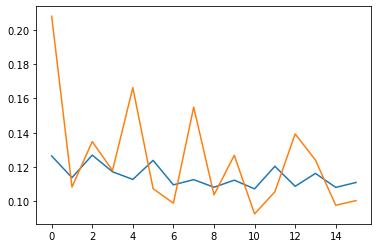

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])

In [ ]:
model.predict(test_x)

63/63 [==============================] - 0s 3ms/step


array([[1.3048269e-08, 2.4563514e-04, 1.8047191e-01, 8.1928253e-01],
       [1.6660845e-09, 7.3065441e-03, 5.0580143e-03, 9.8763543e-01],
       [5.2462809e-07, 2.6676233e-04, 7.5460547e-01, 2.4512720e-01],
       ...,
       [6.2913639e-09, 6.6499887e-03, 1.0370922e-02, 9.8297906e-01],
       [1.5842909e-07, 8.4720778e-01, 5.4794474e-04, 1.5224402e-01],
       [4.5823215e-17, 9.9996710e-01, 3.6249382e-08, 3.2859196e-05]],
      dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred=[np.argmax(y_pred) for y_pred in model.predict(test_x)]

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_test=[np.argmax(y) for y in test_y]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9645177411294353
[[294   0   0   0]
 [  0 218   0  13]
 [  0   0 590  19]
 [  0  11  28 828]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       0.95      0.94      0.95       231
           2       0.95      0.97      0.96       609
           3       0.96      0.96      0.96       867

    accuracy                           0.96      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.96      0.96      0.96      2001

